**Basic setup:**

In [12]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import logging
from pathlib import Path

**Data Handling:**

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

**Preprocessing:**

In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Feature Extraction:**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

**Models:** 

In [86]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

**Evaluation:** 

In [19]:
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.model_selection import cross_val_score, GridSearchCV

**Visualization:**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Persistence:**

In [22]:
import joblib

**Data Handling:**

In [24]:
df = pd.read_csv(r"C:\Documents\Projects\fake_job_detection\data\raw\fake_job_postings.csv")
print(df.head(5))

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [25]:
print("\nInitial shape:", df.shape)
print("Initial columns:", df.columns.tolist())


Initial shape: (17880, 18)
Initial columns: ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']


**Modify the dataset:**

In [26]:
cols_to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 
                'company_profile', 'requirements', 'benefits', 
                'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']
df = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)

In [27]:
df.head(10)

,description,telecommuting,has_company_logo,has_questions,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,"Our client, located in Houston, is actively se...",0,1,0,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0
5,Job OverviewApex is an environmental consultin...,0,0,0,0
6,Your Responsibilities: Manage the English-spea...,0,1,1,0
7,Who is Airenvy?Hey there! We are seasoned entr...,0,1,1,0
8,Implementation/Configuration/Testing/Training ...,0,1,1,0
9,The Customer Service Associate will be based i...,0,1,0,0


In [31]:
df.isnull().sum()

description         1
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [34]:
df['description'] = df['description'].fillna('Missing Description')

In [35]:
df.isnull().sum()

description         0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

**Data Analysis:**

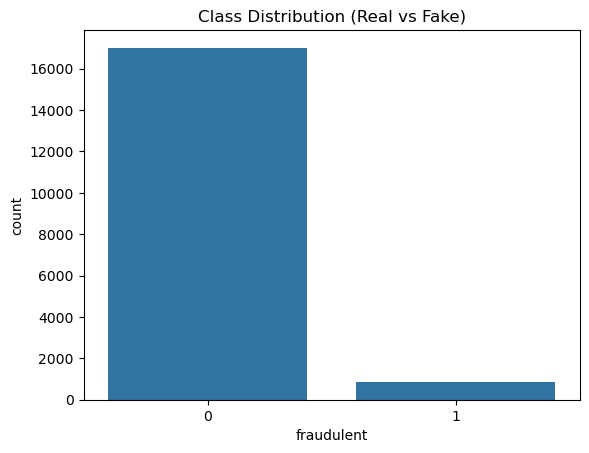

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [29]:
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution (Real vs Fake)')
plt.show()

df['fraudulent'].value_counts()
df.describe()

**Data Cleaning:**
text preprocessing

In [53]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KUNDHAVE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
def preprocess_text(text):
    text = text.lower()  
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  
    return text

**Feature Extraction:**

In [57]:
X = df['description']
y = df['fraudulent']

X = X.apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Create a TfidfVectorizer:

In [58]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
X_train_vect = tfidf_vectorizer.fit_transform(X_train)  
X_test_vect = tfidf_vectorizer.transform(X_test)  

**Data Sampling:**
to fix class inbalance;

In [59]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)

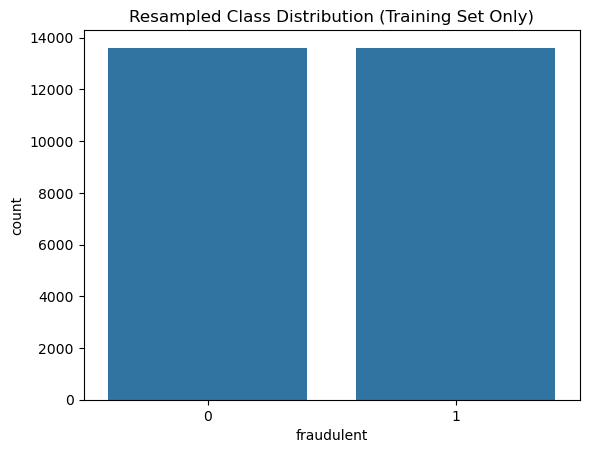

In [61]:
sns.countplot(x=y_train_resampled)
plt.title('Resampled Class Distribution (Training Set Only)')
plt.show()

**Visualization:**

In [63]:
real_text = " ".join(df[df['fraudulent'] == 0]['description'])
fake_text = " ".join(df[df['fraudulent'] == 1]['description'])

Word cloud for real job postings:

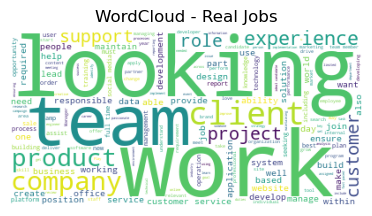

In [64]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(stopwords=stop_words, background_color='white').generate(real_text))
plt.title("WordCloud - Real Jobs")
plt.axis('off')
plt.show()

Word cloud for fake job posting:

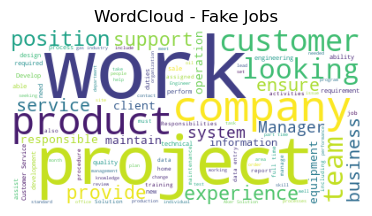

In [65]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(stopwords=stop_words, background_color='white').generate(fake_text))
plt.title("WordCloud - Fake Jobs")
plt.axis('off')
plt.show()

**Top Keywords (TF-IDF features):**

In [66]:
feature_names = tfidf_vectorizer.get_feature_names_out()
mean_tfidf = np.asarray(X_train_vect.mean(axis=0)).flatten()
top_idx = mean_tfidf.argsort()[::-1][:20]
top_features = [(feature_names[i], mean_tfidf[i]) for i in top_idx]

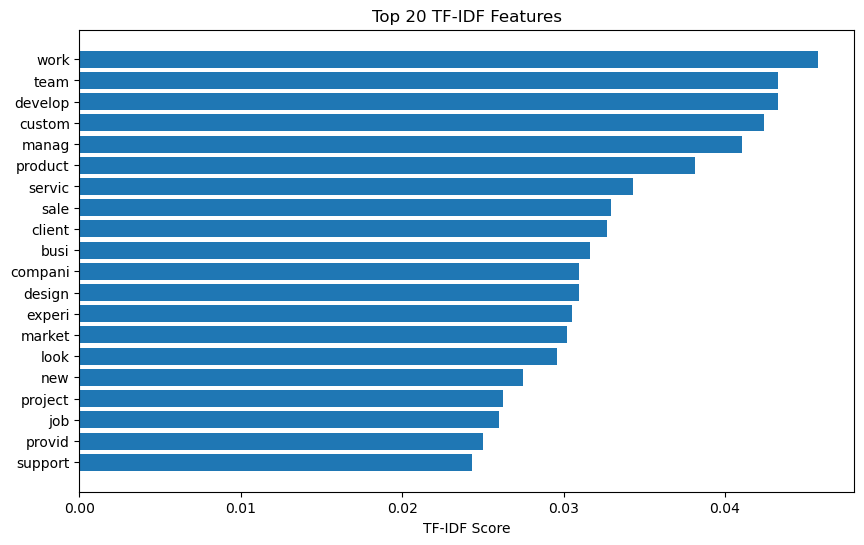

In [83]:
plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in reversed(top_features)], [f[1] for f in reversed(top_features)])
plt.title("Top 20 TF-IDF Features")
plt.xlabel("TF-IDF Score")
plt.show()

**Model Training:**

XG-Boost

In [87]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test_vect)
xgb_probs = xgb_model.predict_proba(X_test_vect)

**Model Evaluation:**

In [88]:
def evaluate_model(preds, probs, y_test, name):
    print(f"\nModel: {name}")
    print("Classification Report:\n", classification_report(y_test, preds))
    acc = accuracy_score(y_test, preds)
    print("Accuracy:", acc)

    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    total = TP + TN + FP + FN

    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print("Classification Accuracy:", (TP + TN) / total)
    print("Classification Error:", (FP + FN) / total)
    print("Precision:", TP / (TP + FP) if (TP + FP) != 0 else 0)
    print("Recall:", TP / (TP + FN) if (TP + FN) != 0 else 0)

    prob_df = pd.DataFrame(probs, columns=["Prob_Real", "Prob_Fake"])
    print("\nSample Probability Predictions:\n", prob_df.head())

Evaluation report of XG-Boost:


Model: XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3403
           1       0.70      0.69      0.70       173

    accuracy                           0.97      3576
   macro avg       0.84      0.84      0.84      3576
weighted avg       0.97      0.97      0.97      3576

Accuracy: 0.9706375838926175


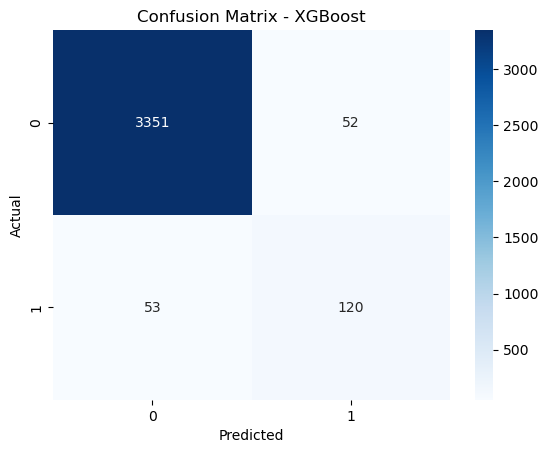

TP: 120, TN: 3351, FP: 52, FN: 53
Classification Accuracy: 0.9706375838926175
Classification Error: 0.02936241610738255
Precision: 0.6976744186046512
Recall: 0.6936416184971098

Sample Probability Predictions:
    Prob_Real  Prob_Fake
0   0.989378   0.010622
1   0.999556   0.000444
2   0.984841   0.015159
3   0.997090   0.002910
4   0.997843   0.002157


In [91]:
evaluate_model(xgb_preds, xgb_probs, y_test, "XGBoost")

**Export Model:**

In [93]:
joblib.dump(xgb_model, r'C:\Documents\Projects\fake_job_detection\models\xgboost_model.pkl')

joblib.dump(tfidf_vectorizer, r'C:\Documents\Projects\fake_job_detection\models\tfidf_vectorizer.pkl')

['C:\\Documents\\Projects\\fake_job_detection\\models\\tfidf_vectorizer.pkl']